In [1]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/all-international-football-results/all_matches.csv')
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral'],
      dtype='object')

In [2]:
Caf_data = df[(df['tournament']=="African Nations Cup") | (df['tournament']=="African Nations Cup qualifier")]
Caf_data

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
4725,1957-02-10,Sudan,Egypt,1,2,African Nations Cup,Sudan,False
4727,1957-02-15,Egypt,Ethiopia,4,0,African Nations Cup,Sudan,True
5244,1959-05-22,United Arab Republic,Ethiopia,4,0,African Nations Cup,United Arab Republic,False
5247,1959-05-25,Sudan,Ethiopia,1,0,African Nations Cup,United Arab Republic,True
5250,1959-05-29,United Arab Republic,Sudan,2,1,African Nations Cup,United Arab Republic,False
...,...,...,...,...,...,...,...,...
51281,2025-12-29,Angola,Egypt,0,0,African Nations Cup,Morocco,True
51282,2025-12-30,Tanzania,Tunisia,1,1,African Nations Cup,Morocco,True
51283,2025-12-30,Senegal,Benin,3,0,African Nations Cup,Morocco,True
51284,2025-12-30,Nigeria,Uganda,3,1,African Nations Cup,Morocco,True


In [3]:
Caf_data.to_csv("Caf_finals_and_qualifier.csv")

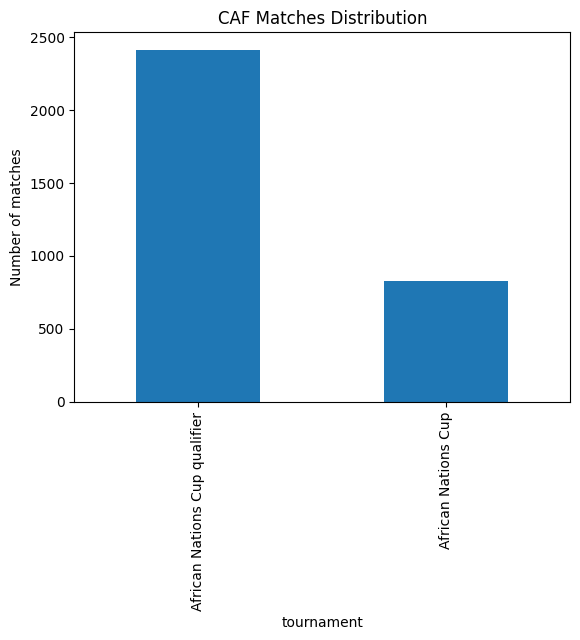

In [4]:
import matplotlib.pyplot as plt

Caf_data['tournament'].value_counts().plot(kind='bar')
plt.title("CAF Matches Distribution")
plt.ylabel("Number of matches")
plt.show()


In [5]:
Caf_data['tournament'].value_counts()

tournament
African Nations Cup qualifier    2412
African Nations Cup               826
Name: count, dtype: int64

In [6]:
df =Caf_data

In [7]:

df.isna().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
def match_to_text(row):
    return (
        f"On {row['date'].date()}, "
        f"{row['home_team']} played against {row['away_team']} "
        f"in an {row['tournament']} match. "
        f"The final score was {row['home_score']}–{row['away_score']} "
        f"and the match was played in {row['country']}."
    )

documents = df.apply(match_to_text, axis=1).tolist()


In [11]:
total_matches = len(df)
finals = (df['tournament'] == 'African Nations Cup').sum()
qualifiers = (df['tournament'] == 'African Nations Cup qualifier').sum()

summary_docs = [
    f"The dataset contains {total_matches} official CAF matches.",
    f"A total of {finals} African Nations Cup final-stage matches were played.",
    f"There were {qualifiers} African Nations Cup qualification matches."
]


In [12]:
# Create a summary of hosts and years
host_summary = df[df['tournament'] == 'African Nations Cup'].groupby('country')['date'].apply(
    lambda x: sorted(list(set(x.dt.year.astype(str))))
).to_dict()

host_docs = []
for country, years in host_summary.items():
    doc = f"{country} hosted the African Nations Cup in the following years: {', '.join(years)}. "
    doc += f"In total, {country} has hosted the tournament {len(years)} time(s)."
    host_docs.append(doc)

# Add these to your documents list
documents.extend(host_docs)

In [13]:
# Example: Most matches played in a country
top_countries = df['country'].value_counts().head(10)
stats_docs = [
    f"The countries that have hosted the most matches in this dataset are: {', '.join(top_countries.index.tolist())}."
]

# Example: Tournament list
tournaments_list = df['tournament'].unique().tolist()
stats_docs.append(f"This dataset covers the following tournaments: {', '.join(tournaments_list)}.")

documents.extend(stats_docs)

In [14]:
team_docs = []

for team in pd.unique(df[['home_team', 'away_team']].values.ravel()):
    matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_docs.append(
        f"{team} participated in {len(matches)} CAF matches in the dataset."
    )


In [15]:
rag_documents = documents + summary_docs + team_docs


In [16]:
import json

with open("rag_documents.json", "w", encoding="utf-8") as f:
    json.dump(rag_documents, f, ensure_ascii=False, indent=2)


In [17]:
pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 26.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [18]:
import json

with open("rag_documents.json", "r", encoding="utf-8") as f:
    documents = json.load(f)

print("Number of RAG documents:", len(documents))


Number of RAG documents: 3321


In [19]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")


2025-12-31 19:57:07.365268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767211027.600530      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767211027.671715      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767211028.265958      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767211028.266009      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767211028.266012      55 computation_placer.cc:177] computation placer alr

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
import numpy as np

embeddings = model.encode(
    documents,
    show_progress_bar=True,
    convert_to_numpy=True
)

print("Embeddings shape:", embeddings.shape)


Batches:   0%|          | 0/104 [00:00<?, ?it/s]

Embeddings shape: (3321, 384)


In [21]:
import faiss

dimension = embeddings.shape[1]  # 384
index = faiss.IndexFlatL2(dimension)

index.add(embeddings)

print("Number of vectors in FAISS index:", index.ntotal)


Number of vectors in FAISS index: 3321


In [22]:
faiss.write_index(index, "caf_faiss.index")


In [23]:
index = faiss.read_index("caf_faiss.index")


In [24]:
def semantic_search(query, k=5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    distances, indices = index.search(query_embedding, k)

    results = [documents[i] for i in indices[0]]
    return results


In [25]:
query = "How many African Nations Cup matches were played in 2025?"
results = semantic_search(query)

for r in results:
    print("-", r)


- There were 2412 African Nations Cup qualification matches.
- A total of 826 African Nations Cup final-stage matches were played.
- On 2025-12-28, Mozambique played against Gabon in an African Nations Cup match. The final score was 3–2 and the match was played in Morocco.
- On 2025-12-30, Nigeria played against Uganda in an African Nations Cup match. The final score was 3–1 and the match was played in Morocco.
- On 2025-12-23, Nigeria played against Tanzania in an African Nations Cup match. The final score was 2–1 and the match was played in Morocco.


In [26]:
import pandas as pd
import sqlite3

# Load data from CSV file into a pandas DataFrame
df = pd.read_csv('Caf_finals_and_qualifier.csv')

# Connect to the SQLite database (creates a new file if needed)
conn = sqlite3.connect('matches.db')

# Write the data into a new SQL table
# if_exists='replace' drops the table and creates a new one each time
df.to_sql('tablename', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()